# 500Px  Machine  Learning Intern Tech Challenge

The following notebook  shows how adverserial images can be created and used to 'fool' image classifiers.

The MNIST dataset is used to  demsonstrate this.

The following cell contains code taken directly from the Tensorflow 'Deep MNNIST for Experts' tutorial. A simple linear MNIST classifier is trained.

In [2]:

# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""A very simple MNIST classifier.

See extensive documentation at
http://tensorflow.org/tutorials/mnist/beginners/index.md
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


import tensorflow as tf
sess = tf.InteractiveSession()


x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.initialize_all_variables())


y = tf.matmul(x,W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for i in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})


    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.4075
0.4029
0.4927
0.5023
0.6827
0.4972
0.7257
0.7076
0.6808
0.7821
0.7311
0.7984
0.7478
0.7959
0.816
0.8162
0.8256
0.8379
0.8455
0.7874
0.8062
0.8478
0.8206
0.8508
0.8498
0.8481
0.8395
0.83
0.8551
0.8696
0.8515
0.8429
0.8581
0.8546
0.8602
0.8588
0.8337
0.8494
0.7981
0.8557
0.869
0.8695
0.8684
0.8542
0.8672
0.8553
0.8643
0.8606
0.8672
0.8609
0.8725
0.8744
0.8247
0.8613
0.8773
0.878
0.875
0.8757
0.8839
0.8809
0.8772
0.876
0.869
0.8794
0.8745
0.8747
0.8716
0.8671
0.8655


# Create Adverserial images
Now that the classifier has been trained, we can use the trained weights to generate the adverserial images.

The "2's" are extracted from the  MNIST test set and classified using the trained linear classifier.  Ten random examples from the correct predictions  are then used to create the  adverserial data.




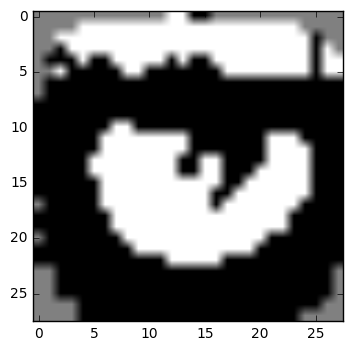

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


# Save the weights in a numpy array
Weights  = W.eval()

# The perturbations for the adverserial images were created using the 'Fast Gradient Sign' method 
# as described in 'EXPLAINING AND HARNESSING ADVERSARIAL EXAMPLES' by Goodfellow et al
perturbance = np.sign(Weights[:,[6]])


# Display the perturbance
plt.imshow(np.reshape(perturbance,(28,28)), cmap = 'gray')


In [4]:
#  The test set data is extracted so that we can get some 2's with which to create the adverserial images

data = mnist.test.images
labels = mnist.test.labels


In [5]:
# Extract all of the 2's from the test data set

# This creates a logical vector which contains a marker for the location of every 2 in the test set.
twos_loc = labels[:,[2]]==1  


In [6]:
# the logical vector 'twos_loc' is used to extract all of the twos from the test data


# Extract all of the 2's from the data 
twos_data = data[np.squeeze(twos_loc),:]

# There are 1032 2's in the test set



In [8]:
# run the classifier on all of the twos in the test data set to get predictions for each

check = (sess.run(y, feed_dict={x:twos_data})) # check contains all of the classified twos


In [9]:
# Find the 2's which have been correctly classified

# Get the prediction for each test set example
pred = np.argmax(check,axis=1) 

# Find the locations where the predictions are correct
correct_bool = pred == 2 

#Extract the correctly predicted twos from the test set
correct_preds = twos_data[correct_bool] 





In [10]:
# Pick ten random examples from the correctly classified 2's

rand_ten = np.random.randint(0, high=len(correct_preds), size = 10) 


# 'chosen_twos' now contains 10 random examples from the '2' class which have been correctly classified.
chosen_twos = correct_preds[rand_ten]


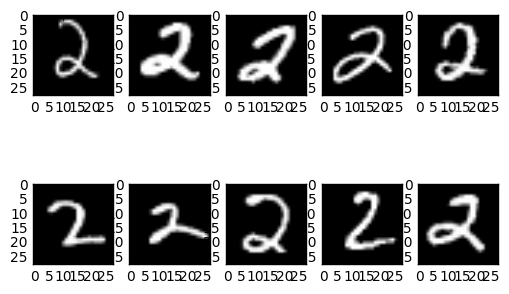

In [11]:
# Display the correctly classified twos

plt.subplot(2,5,1)
plt.imshow(np.reshape(chosen_twos[0,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,2)
plt.imshow(np.reshape(chosen_twos[1,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,3)
plt.imshow(np.reshape(chosen_twos[2,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,4)
plt.imshow(np.reshape(chosen_twos[3,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,5)
plt.imshow(np.reshape(chosen_twos[4,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,6)
plt.imshow(np.reshape(chosen_twos[5,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,7)
plt.imshow(np.reshape(chosen_twos[6,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,8)
plt.imshow(np.reshape(chosen_twos[7,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,9)
plt.imshow(np.reshape(chosen_twos[8,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,10)
plt.imshow(np.reshape(chosen_twos[9,:],(28,28)),cmap = 'gray')



In [12]:
# The 10 randomly chosen, correctly classified examples can be now used to create the adverserial images

# The value of epsilon can be changed here to test the effects of different amounts of disturbance
epsilon = 0.2

advs_images = chosen_twos + (epsilon * np.repeat(np.transpose(perturbance),10,axis = 0)) 


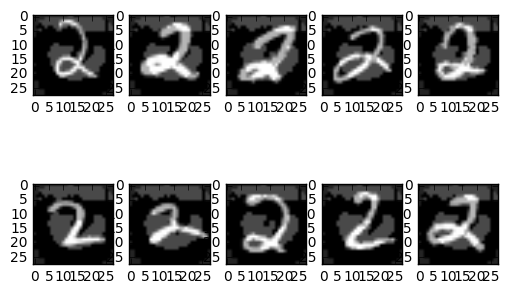

In [13]:
# Display the adverserial images

plt.subplot(2,5,1)
plt.imshow(np.reshape(advs_images[0,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,2)
plt.imshow(np.reshape(advs_images[1,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,3)
plt.imshow(np.reshape(advs_images[2,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,4)
plt.imshow(np.reshape(advs_images[3,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,5)
plt.imshow(np.reshape(advs_images[4,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,6)
plt.imshow(np.reshape(advs_images[5,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,7)
plt.imshow(np.reshape(advs_images[6,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,8)
plt.imshow(np.reshape(advs_images[7,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,9)
plt.imshow(np.reshape(advs_images[8,:],(28,28)),cmap = 'gray')
plt.subplot(2,5,10)
plt.imshow(np.reshape(advs_images[9,:],(28,28)),cmap = 'gray')



In [14]:
# Use the trained classifier to classify the adverserial images

adv_check = (sess.run(y, feed_dict={x: advs_images}))

In [15]:
# The adv_preds vector contains the predictions for each of the examples

adv_preds = np.argmax(adv_check,axis=1)

# The adv_preds vector shows the precictions made by the linear classifier on the 10 adverserial images
print(adv_preds)

[6 6 6 6 6 6 6 6 6 6]


# The Linear Classifier has been 'Fooled'

The cell above generates the predictions made by the classifier on the adverserial data. It can be seen that for a value of $\epsilon = 0.2$ the classifier has misclassified each of the images as a 6. In the comparison of the original images, the adverserial data and the 'delta' displayed below, a small amount of perturbance is perceptible in the adverserial images, though they are still percievably 2's and do not look like 6's. This demonstrates the vulnerability of the linear classifier to perturbance. 

(-0.5, 27.5, 27.5, -0.5)

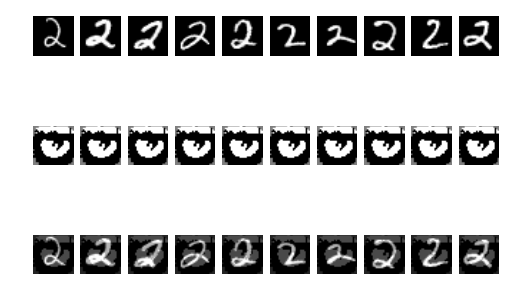

In [16]:

# plot showing the 3 rows of images with the original images in the top row, 'delta' in the second and adverserial
# images in the bottom row

# Original images
plt.subplot(3,10,1)
plt.imshow(np.reshape(chosen_twos[0,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,2)
plt.imshow(np.reshape(chosen_twos[1,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,3)
plt.imshow(np.reshape(chosen_twos[2,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,4)
plt.imshow(np.reshape(chosen_twos[3,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,5)
plt.imshow(np.reshape(chosen_twos[4,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,6)
plt.imshow(np.reshape(chosen_twos[5,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,7)
plt.imshow(np.reshape(chosen_twos[6,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,8)
plt.imshow(np.reshape(chosen_twos[7,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,9)
plt.imshow(np.reshape(chosen_twos[8,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,10)
plt.imshow(np.reshape(chosen_twos[9,:],(28,28)),cmap = 'gray');
plt.axis('off')


# Deltas. This is the difference between the adverserial images and the original images
plt.subplot(3,10,11)
plt.imshow(np.reshape(advs_images[0,:],(28,28))-np.reshape(chosen_twos[0,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,12)
plt.imshow(np.reshape(advs_images[1,:],(28,28))- np.reshape(chosen_twos[1,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,13)
plt.imshow(np.reshape(advs_images[2,:],(28,28))- np.reshape(chosen_twos[2,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,14)
plt.imshow(np.reshape(advs_images[3,:],(28,28))- np.reshape(chosen_twos[3,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,15)
plt.imshow(np.reshape(advs_images[4,:],(28,28))- np.reshape(chosen_twos[4,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,16)
plt.imshow(np.reshape(advs_images[5,:],(28,28))- np.reshape(chosen_twos[5,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,17)
plt.imshow(np.reshape(advs_images[6,:],(28,28))- np.reshape(chosen_twos[6,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,18)
plt.imshow(np.reshape(advs_images[7,:],(28,28))- np.reshape(chosen_twos[7,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,19)
plt.imshow(np.reshape(advs_images[8,:],(28,28))- np.reshape(chosen_twos[8,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,20)
plt.imshow(np.reshape(advs_images[9,:],(28,28))- np.reshape(chosen_twos[9,:],(28,28)),cmap = 'gray');
plt.axis('off')


# Adverserial images
plt.subplot(3,10,21)
plt.imshow(np.reshape(advs_images[0,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,22)
plt.imshow(np.reshape(advs_images[1,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,23)
plt.imshow(np.reshape(advs_images[2,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,24)
plt.imshow(np.reshape(advs_images[3,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,25)
plt.imshow(np.reshape(advs_images[4,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,26)
plt.imshow(np.reshape(advs_images[5,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,27)
plt.imshow(np.reshape(advs_images[6,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,28)
plt.imshow(np.reshape(advs_images[7,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,29)
plt.imshow(np.reshape(advs_images[8,:],(28,28)),cmap = 'gray');
plt.axis('off')
plt.subplot(3,10,30)
plt.imshow(np.reshape(advs_images[9,:],(28,28)),cmap = 'gray');
plt.axis('off')



# Fooling  a Convolutional net

The following section of code is also taken directly from  the Tensorflow 'MNIST for experts' tutorial

A  Convolutional net is trained using the MNIST data.  The adverserial images created previously can then be used to 'fool' the  classifier. Note that this classifier may take several minutes to complete training.

In [ ]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2



cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv,labels= y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0, training accuracy 0.02
step 100, training accuracy 0.76
step 200, training accuracy 0.9
step 300, training accuracy 0.98
step 400, training accuracy 0.96
step 500, training accuracy 1
step 600, training accuracy 0.94
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.98
step 1000, training accuracy 1
step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 0.92
step 1400, training accuracy 0.98
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 0.94
step 1800, training accuracy 0.98
step 1900, training accuracy 0.98
step 2000, training accuracy 1
step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 0.98
step 2400, training accuracy 0.98
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 0.98

In [149]:

# Get predictions for the adverserial images from the convolutional net

conv_check = (sess.run(y_conv, feed_dict={x: advs_images, keep_prob :0.5}))

In [151]:
# A higher value of epsilon is required to fool the convolutional net
conv_check = np.argmax(conv_check,axis=1)
print(conv_check)

[2 6 2 6 6 6 6 2 6 6]


In [ ]:
# This is the same cell of code used before, the convolutional net requires a higher epsilon value to 
# misclassify the images, run this cell then run the conv_check again ot test the effects of different values of 
# epsilon

# The value of epsilon can be changed here to test the effects of different amounts of disturbance
epsilon = 0.2

advs_images = chosen_twos + (epsilon * np.repeat(np.transpose(perturbance),10,axis = 0)) 

# Summary and Discussion

Adverserial images were created using the weights from the linear softmax classifier taken directly from the TensorFlow 'MNIST for experts' tutorial. Creating the perturbances is fairly straightforward for a simple linear classifier because the gradients of the output with respect to the input are equal to the weights:

$S = W^TX, \nabla_XS = W$

For a neural network with more layers, the backpropagation algorithm could be implemented to find the gradient of the cost with respect to the input image x, then an update performed on the value of the input in order to 'shift' the values of the input pixels impercievably to produce an incorrect class score.

The 10 examples from class '2' were selected by classifying all of the 2's from the test set, then selecting 10 random correctly classified examples from these. A fraction, $\epsilon$, of the perturbance was then added to each of the correctly classified examples. These examples were then classified using the trained linear classifier. For an $\epsilon$ value of around 0.2, all of the adverserial examples are misclassified as 6's. As the value of $\epsilon$ is decreased only some of the 2's are misclassified as 6's, for a value of $\epsilon$ around 0.05 the perturbation is not sufficient to 'fool' the classifier.

Using the Convolutional network code from the 'MNIST for experts' tutorial, a convolutional net was trained, then the adverserial examples created previously were passed through the network. It was noted that the convolutional network was also able to be 'fooled' by the adverserial images, but larger values of $\epsilon$ were required. This highlights the fact that adverserial images able to generalise across different classifiers. 
